# Pythonic Monopoly
Harold's company has just started a new Real Estate Investment division to provide customers with a broader range of portfolio options. Harold was tasked with building a prototype dashboard, and he needs your help. The real estate team wants to trial this initial offering with investment opportunities for the Toronto market. If the new service is popular, then they can start to expand to other markets.

This dashboard's goal is to provide charts, maps, and interactive visualizations that help customers explore the data and determine if they want to invest in rental properties in Toronto.

## Toronto Dwellings Analysis
Performing fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [33]:
# imports
import panel as pn
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

In [34]:
# Set up Panel Plotly extension
pn.extension('plotly')

In [35]:
import hvplot.pandas

In [36]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [37]:
# Read the census data into a Pandas DataFrame
file_path = Path("../Data/toronto_neighbourhoods_census_data.csv")
to_data=pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function.

Hint: Use the Pandas groupby function.


In [38]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
to_data_per_year = to_data.groupby('year').sum()
to_data_per_year.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


### Optional challenge: 
Plot each bar chart in a different color.

In [39]:
dwelling_types  = [x for x in to_data_per_year.columns]
plot = to_data_per_year[dwelling_types[0]].hvplot(kind="bar",yformatter='%f')
for i in range(1,len(dwelling_types)):
    plot = plot * to_data_per_year[dwelling_types[i]].hvplot(kind="bar",yformatter='%f')

In [40]:
plot

:Overlay
   .Bars.Single_detached_house       :Bars   [year]   (single_detached_house)
   .Bars.Apartment_five_storeys_plus :Bars   [year]   (apartment_five_storeys_plus)
   .Bars.Movable_dwelling            :Bars   [year]   (movable_dwelling)
   .Bars.Semi_detached_house         :Bars   [year]   (semi_detached_house)
   .Bars.Row_house                   :Bars   [year]   (row_house)
   .Bars.Duplex                      :Bars   [year]   (duplex)
   .Bars.Apartment_five_storeys_less :Bars   [year]   (apartment_five_storeys_less)
   .Bars.Other_house                 :Bars   [year]   (other_house)
   .Bars.Average_house_value         :Bars   [year]   (average_house_value)
   .Bars.Shelter_costs_owned         :Bars   [year]   (shelter_costs_owned)
   .Bars.Shelter_costs_rented        :Bars   [year]   (shelter_costs_rented)

In [41]:
# Save the dataframe as a csv file
to_data_per_year.to_csv("../Data/Export_to_data_per_year.csv")  

In [42]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    plot = data.hvplot(kind="bar", rot=90,yformatter='%f')
    plot.opts(title=title)
    plot.opts(xlabel=xlabel)
    plot.opts(ylabel=ylabel)
    plot.opts(color=color)
    return plot

In [43]:
# Create a bar chart per year to show the number of dwelling types


# Bar chart for 2001
plots_2001 =  create_bar_chart(to_data_per_year.iloc[0],"Dwelling Types in Toronto in 2001","2001","Dwelling Type Units","red")

# Bar chart for 2006
plots_2006 =  create_bar_chart(to_data_per_year.iloc[1],"Dwelling Types in Toronto in 2006","2006","Dwelling Type Units","blue")


# Bar chart for 2011
plots_2011 =  create_bar_chart(to_data_per_year.iloc[2],"Dwelling Types in Toronto in 2011","2011","Dwelling Type Units","purple")

# Bar chart for 2016
plots_2016 =  create_bar_chart(to_data_per_year.iloc[3],"Dwelling Types in Toronto in 2016","2016","Dwelling Type Units","yellow")

In [44]:
pn_yearly_column = pn.Column("Dwelling Types in Toronto", plots_2001, plots_2006, plots_2011, plots_2016)
pn_yearly_column 

Column
    [0] Markdown(str)
    [1] HoloViews(Bars)
    [2] HoloViews(Bars)
    [3] HoloViews(Bars)
    [4] HoloViews(Bars)

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

Optional challenge: Plot each line chart in a different color

In [45]:
# Calculate the average monthly shelter costs for owned and rented dwellings
df_monthly_shelter_costs = pd.DataFrame(round(to_data[["shelter_costs_owned","shelter_costs_rented"]].groupby("year").mean(),2))
df_monthly_shelter_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.88,1085.94
2006,1316.80,925.41
2011,1448.21,1019.79
2016,1761.31,1256.32


In [46]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    return data.plot(title=title, ylabel=ylabel,xlabel=xlabel,color=color)

Column
    [0] Markdown(str)
    [1] Str(AxesSubplot)
    [2] Str(AxesSubplot)

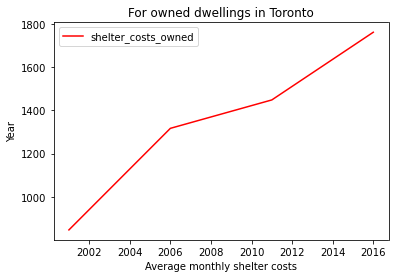

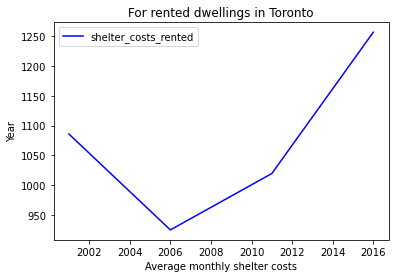

In [47]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
plot_shelter_costs_owned = create_line_chart(df_monthly_shelter_costs[["shelter_costs_owned"]],"For owned dwellings in Toronto","Average monthly shelter costs","Year", color="Red")

# Line chart for rented dwellings
plot_shelter_costs_rented = create_line_chart(df_monthly_shelter_costs[["shelter_costs_rented"]],"For rented dwellings in Toronto","Average monthly shelter costs","Year", color="Blue")

pn_shelter_costs_column = pn.Column(" Average monthly shelter costs", plot_shelter_costs_owned, plot_shelter_costs_rented)
pn_shelter_costs_column

## Average House Value per Year

In this section, we are determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the average_house_value per year as a bar chart.

In [48]:
# Calculate the average house value per year
to_data = pd.read_csv(file_path, index_col=["year","neighbourhood"])
average_house_value = to_data["average_house_value"].groupby("year").mean()
average_house_value.head()

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

<AxesSubplot:title={'center':'Average value of a home in Toronto'}, xlabel='year', ylabel='Average Home Price (CAD)'>

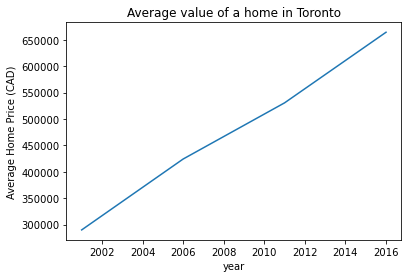

In [49]:
# Plot the average house value per year as a line chart
average_house_value.plot(kind="line", title="Average value of a home in Toronto",xlabel="year",ylabel="Average Home Price (CAD)")

## Average House Value by Neighbourhood

In this section, you will use hvplot to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [50]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_home_value_per_neighbourhood = to_data["average_house_value"].groupby(by=["year","neighbourhood"]).mean()
avg_home_value_per_neighbourhood.head()

year  neighbourhood               
2001  Agincourt North                 200388.0
      Agincourt South-Malvern West    203047.0
      Alderwood                       259998.0
      Annex                           453850.0
      Banbury-Don Mills               371864.0
Name: average_house_value, dtype: float64

In [51]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_home_value_per_neighbourhood.hvplot(kind="line", x="year", y="average_house_value", width=500, 
                         groupby="neighbourhood",widget_location="top_left")

Column
    [0] Row
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] HSpacer()
    [1] HoloViews(DynamicMap, widget_location='top_left')

## Number of Dwelling Types per Year

In this section, you will use hvplot to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [52]:
# Fetch the data of all dwelling types per year
to_data = pd.read_csv(file_path)
to_data.head()
#removing the average house value for better swelling visulization 
avg_dwelling_types = to_data.drop(columns=["average_house_value"])

In [53]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_dwelling_types.hvplot(kind="bar", x='year', rot=90 , xlabel="year",ylabel="dwelling type units",groupby="neighbourhood",widget_location="top_left",width=600,height=400)

Column
    [0] Row
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] HSpacer()
    [1] HoloViews(DynamicMap, widget_location='top_left')

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [54]:
# Getting the data from the top 10 expensive neighbourhoods
to_top_10neighbourhoods=to_data.drop(columns=["year"]).groupby(by=["neighbourhood"]).mean().nlargest(10,"average_house_value")
to_top_10neighbourhoods.head(10)

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00


In [55]:
# Plotting the data from the top 10 expensive neighbourhoods
to_top_10neighbourhoods.hvplot(kind="bar",x="neighbourhood", y="average_house_value", xlabel="Neighbourhood",ylabel="Average House Value", rot=90 ,width=1000,height=600)

:Bars   [neighbourhood]   (average_house_value)

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a scatter_mapbox from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Location Data

In [56]:
# Load neighbourhoods coordinates data
file_path = Path("../Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


## Data Preparation

You will need to join the location data with the mean values per neighbourhood.

Calculate the mean values for each neighbourhood.

Join the average values with the neighbourhood locations.

In [57]:
# Calculate the mean values for each neighborhood
df_to_avg_house_prices= to_data.drop(columns=["year"]).groupby(by=["neighbourhood"]).mean()
df_to_avg_house_prices.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [58]:
# Join the average values with the neighbourhood locations
df_to_avg_house_prices_with_location = pd.merge(df_neighbourhood_locations,df_to_avg_house_prices,on="neighbourhood",how="inner")
df_to_avg_house_prices_with_location.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


## Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express scatter_mapbox visualization.

In [59]:
# Create a scatter mapbox to analyze neighbourhood info
to_neighbourhoods = px.scatter_mapbox(
    df_to_avg_house_prices_with_location,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=100, 
    title="Toronto's neighbourhoods avg. house prices", 
    width=1000,
)

In [60]:
map_column = pn.Column("Scatter Mapbox To analyze neighbourhood info", to_neighbourhoods)

In [61]:
map_column

Column
    [0] Markdown(str)
    [1] Plotly(Figure)

## Cost Analysis 

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods.

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [62]:
def create_bar_chart(data, title, xlabel, ylabel, color):
    plt.bar(x=data.index, height=data.dwelling_number, color=color, width = 0.6)
    plt.title(title,fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [63]:
# Fetch the data from all expensive neighbourhoods per year.
